### Assignment 3: EDA and Prediction with Logistic Regression 

### You must push a version before next Thursday at class time! 

### The Heart Disease Prediction dataset provides vital insight in the relationship between risk factors and cardiac health. This dataset contains 270 case studies of individuals classified as either having or not having heart disease based on results from cardiac catheterizations - the gold standard in heart health assessment. Each patient is identified by 13 independent predictive variables revealing their age, sex, chest pain type, blood pressure measurements, cholesterol levels, electrocardiogram results, exercise-induced angina symptoms, and the number of vessels seen on fluoroscopy showing narrowing of their coronary arteries

In [36]:
import pandas as pd  
heart = pd.read_csv('Heart.csv')

### 2. Use pandas method to summarize the properties of the data. Use `head` and `info` and `.value_counts` and `describe` pandas methods to explore the data. 
### Identify which variables are categorical, and which variables are numeric.For categorical data, use `.value_counts` to identify any variables that are highly imbalanced.  
### Are there any missing data? 
### What is the primary target variable (i.e., variable to predict).  Are there any interesting secondary variables to predict? 
### After your exploration, write a few sentences in a markdown box to comment on these questions.  

In [37]:
import pandas as pd

path = 'heart.csv' 
heart = pd.read_csv(path)


print("Column names:")
print(heart.columns)
print("\nHead of the dataset:")
print(heart.head())
print("\nInformation about the dataset:")
print(heart.info())
print("\nMissing data:")
print(heart.isnull().sum())
categorical_variables = ['Sex', 'ChestPain', 'Fbs', 'RestECG', 'ExAng', 'Slope', 'Thal', 'AHD']
print("\nValue counts for categorical variables:")
for var in categorical_variables:
    try:
        print(f"\n{var}:")
        print(heart[var].value_counts())
    except KeyError as e:
        print(f"Error: {e}. Check if the column name '{var}' exists in the dataset.")

print("\nDescription of numeric variables:")
print(heart.describe())
target= 'AHD' 
print("\nPrimary target variable:")
print(f"{target}:")
print(heart[target].value_counts())

secondary_variables = ['Age', 'Chol']
print("\nInteresting secondary variables:")
for var in secondary_variables:
    print(f"{var}:")


Column names:
Index(['Unnamed: 0', 'Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs',
       'RestECG', 'MaxHR', 'ExAng', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'AHD'],
      dtype='object')

Head of the dataset:
   Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  \
0           1   63    1       typical     145   233    1        2    150   
1           2   67    1  asymptomatic     160   286    0        2    108   
2           3   67    1  asymptomatic     120   229    0        2    129   
3           4   37    1    nonanginal     130   250    0        0    187   
4           5   41    0    nontypical     130   204    0        2    172   

   ExAng  Oldpeak  Slope   Ca        Thal  AHD  
0      0      2.3      3  0.0       fixed   No  
1      1      1.5      2  3.0      normal  Yes  
2      1      2.6      2  2.0  reversable  Yes  
3      0      3.5      3  0.0      normal   No  
4      0      1.4      1  0.0      normal   No  

Information about the dataset:
<class '

### 2.  Use Seaborn to explore the numeric data graphically. Two goals here. First, are there any variables that are highly correlated with each other.  Second, are there any variables that seem likely to be helpful in building a model that can predict heart disease. Write your hypothesis in the markdown box provided.  

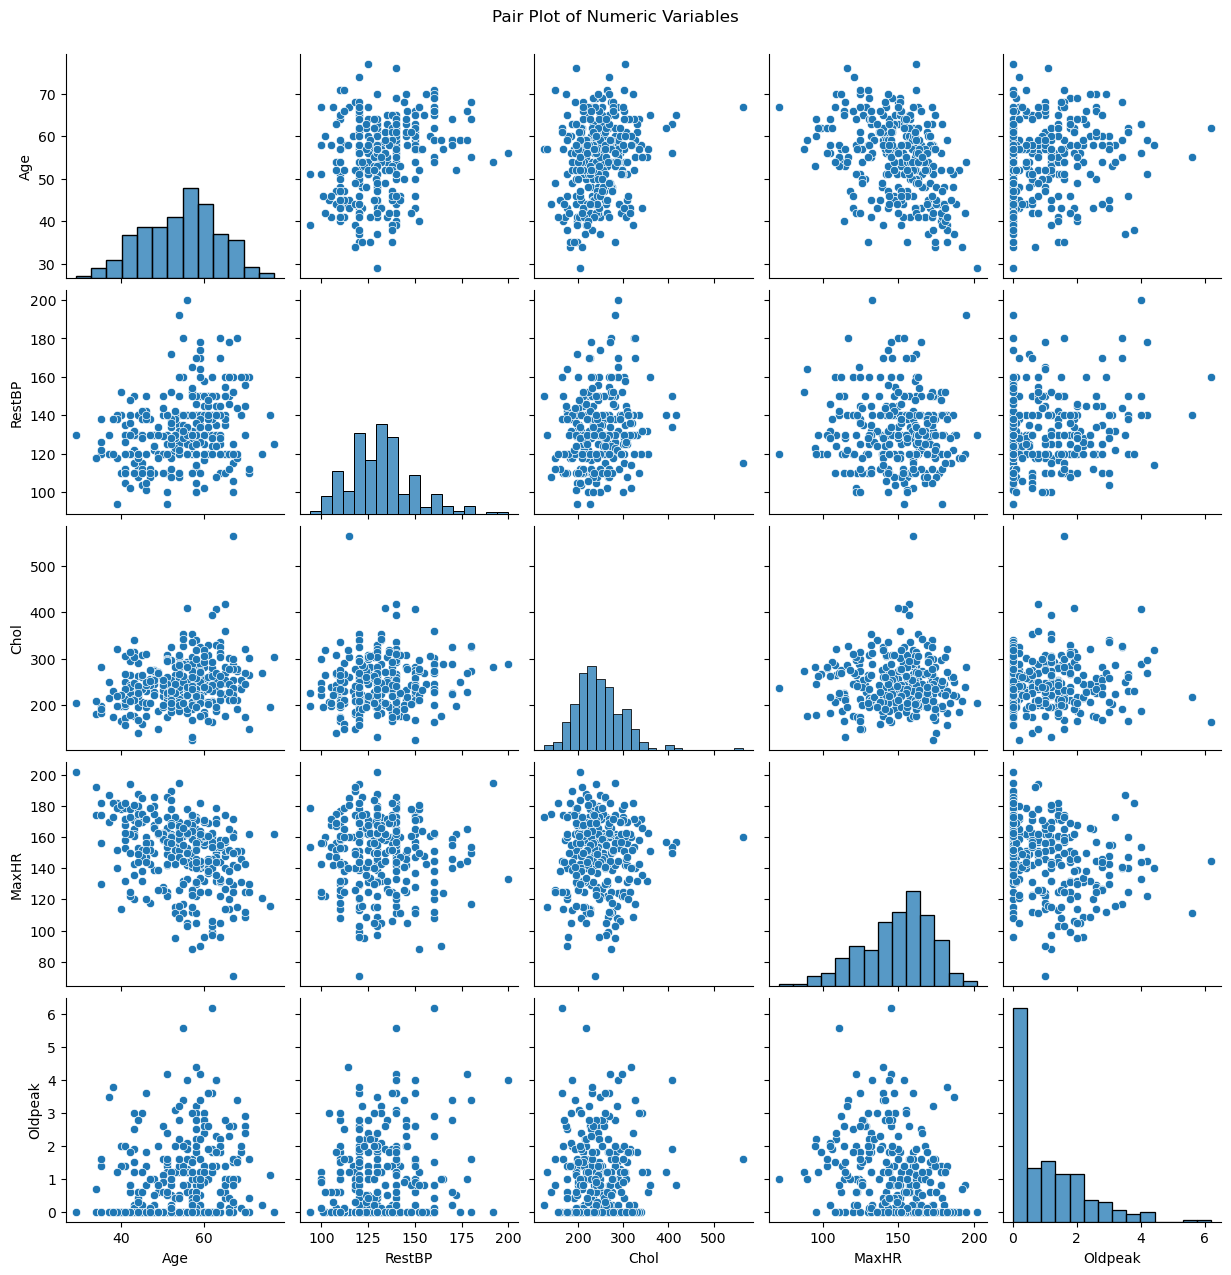

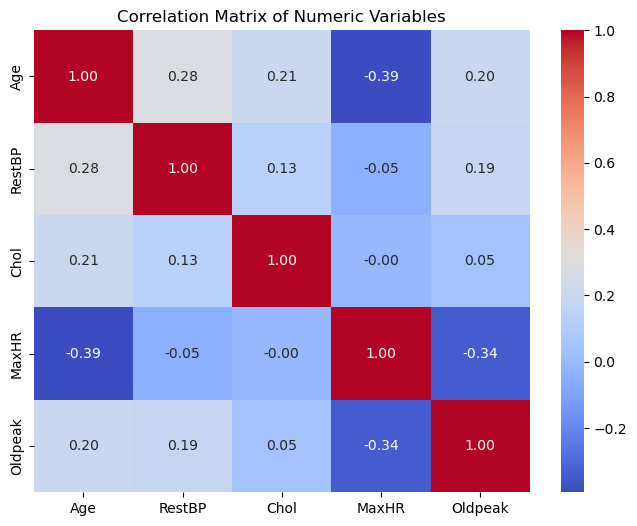

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


numeric_variables = ['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']
sns.pairplot(heart_data[numeric_variables])
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

correlation_matrix = heart_data[numeric_variables].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables')
plt.show()


### 3. As the analysis plan is to use a Logistic Regression model, all variables will need to be converted to numeric representations. One way to do this is `pd.get_dummies` which I give an example below. The other way to do it is to use .map method and define an encoder. 

### I show both approaches below.  Typically, if there is an obvious hierarchical relationship, I might use my own encoder to express that.  If there isnt, get_dummies is more sensible then a hierarchical approach

### After you encode the heart data, feel free to delete my example code.  

In [39]:
categories = [('Type',['Cat','Dog','Parrot','Whale']),
              ('Color',['Brown','Black','Mixed'])]



X = pd.DataFrame(columns=['Type','Color','Age'],
                       data=[['Cat','Brown',4.2],['Dog','Brown',3.2],['Parrot','Mixed',21]])
X_dummy = pd.get_dummies(X)
display(X, X_dummy)  #This is similar to head, but shows everything.  

encoder = {'Cat':1,'Dog':2,'Parrot':3,'Whale':4}
X_encoder = X['Type'].map(encoder)
X['Type_enc'] = X_encoder
display(X)

import pandas as pd

heart_data = pd.DataFrame({
    'Sex': ['Male', 'Female', 'Male', 'Female'],
    'ChestPain': ['Typical', 'Atypical', 'Nonanginal', 'Typical'],
    'Fbs': [1, 0, 1, 0],
    'RestECG': ['Normal', 'Abnormal', 'Normal', 'Abnormal'],
    'ExAng': [0, 1, 0, 1],
    'Slope': ['Up', 'Flat', 'Down', 'Up'],
    'Thal': ['Fixed', 'Normal', 'Reversable', 'Normal'],
    'AHD': ['No', 'Yes', 'No', 'Yes']
})

heart_data_dummies = pd.get_dummies(heart_data, columns=['Sex', 'ChestPain', 'RestECG', 'Slope', 'Thal'], drop_first=True)

display(heart_data, heart_data_dummies)

sex_encoder = {'Male': 1, 'Female': 0}
chest_pain_encoder = {'Typical': 1, 'Atypical': 2, 'Nonanginal': 3}
rest_ecg_encoder = {'Normal': 1, 'Abnormal': 0}
slope_encoder = {'Up': 1, 'Flat': 2, 'Down': 3}
thal_encoder = {'Fixed': 1, 'Normal': 2, 'Reversable': 3}
ahd_encoder = {'Yes': 1, 'No': 0}

heart_data['Sex_enc'] = heart_data['Sex'].map(sex_encoder)
heart_data['ChestPain_enc'] = heart_data['ChestPain'].map(chest_pain_encoder)
heart_data['RestECG_enc'] = heart_data['RestECG'].map(rest_ecg_encoder)
heart_data['Slope_enc'] = heart_data['Slope'].map(slope_encoder)
heart_data['Thal_enc'] = heart_data['Thal'].map(thal_encoder)
heart_data['AHD_enc'] = heart_data['AHD'].map(ahd_encoder)

display(heart_data)


,Type,Color,Age
0,Cat,Brown,4.2
1,Dog,Brown,3.2
2,Parrot,Mixed,21.0


,Age,Type_Cat,Type_Dog,Type_Parrot,Color_Brown,Color_Mixed
0,4.2,1,0,0,1,0
1,3.2,0,1,0,1,0
2,21.0,0,0,1,0,1


,Type,Color,Age,Type_enc
0,Cat,Brown,4.2,1
1,Dog,Brown,3.2,2
2,Parrot,Mixed,21.0,3


,Sex,ChestPain,Fbs,RestECG,ExAng,Slope,Thal,AHD
0,Male,Typical,1,Normal,0,Up,Fixed,No
1,Female,Atypical,0,Abnormal,1,Flat,Normal,Yes
2,Male,Nonanginal,1,Normal,0,Down,Reversable,No
3,Female,Typical,0,Abnormal,1,Up,Normal,Yes


,Fbs,ExAng,AHD,Sex_Male,ChestPain_Nonanginal,ChestPain_Typical,RestECG_Normal,Slope_Flat,Slope_Up,Thal_Normal,Thal_Reversable
0,1,0,No,1,0,1,1,0,1,0,0
1,0,1,Yes,0,0,0,0,1,0,1,0
2,1,0,No,1,1,0,1,0,0,0,1
3,0,1,Yes,0,0,1,0,0,1,1,0


,Sex,ChestPain,Fbs,RestECG,ExAng,Slope,Thal,AHD,Sex_enc,ChestPain_enc,RestECG_enc,Slope_enc,Thal_enc,AHD_enc
0,Male,Typical,1,Normal,0,Up,Fixed,No,1,1,1,1,1,0
1,Female,Atypical,0,Abnormal,1,Flat,Normal,Yes,0,2,0,2,2,1
2,Male,Nonanginal,1,Normal,0,Down,Reversable,No,1,3,1,3,3,0
3,Female,Typical,0,Abnormal,1,Up,Normal,Yes,0,1,0,1,2,1


### 4. We are going to have to decide how we want to cross-validate the models we build. First split the data into training and test data (using `train_test_split`). I recommend 25% test set data.   Then using the training data only, make use of K-fold cross validation to create multiple training and test sets. I recommend doing 5-folds.    

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

file_path = 'heart.csv'
heart_data = pd.read_csv(file_path)

heart_data_encoded = pd.get_dummies(heart_data, columns=['ChestPain', 'Thal'], drop_first=True)

X = heart_data_encoded.drop('AHD', axis=1)  
y = heart_data_encoded['AHD'] 

imputer = SimpleImputer(strategy='mean')  
X_imputed = imputer.fit_transform(X)
X = pd.DataFrame(X_imputed, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Class Distribution in Training Set:")
print(y_train.value_counts())

num_splits = min(3, y_train.value_counts().min())  # Adjust as needed

kf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

model = LogisticRegression()
model = LogisticRegression(max_iter=1000)


cv_train_accuracy = []
cv_test_accuracy = []

for train_index, test_index in kf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    model.fit(X_train_cv, y_train_cv)

    train_predictions = model.predict(X_train_cv)
    train_accuracy = accuracy_score(y_train_cv, train_predictions)
    cv_train_accuracy.append(train_accuracy)

    test_predictions = model.predict(X_test_cv)
    test_accuracy = accuracy_score(y_test_cv, test_predictions)
    cv_test_accuracy.append(test_accuracy)

print(f"Mean Training Accuracy: {sum(cv_train_accuracy) / len(cv_train_accuracy)}")
print(f"Mean Test Accuracy: {sum(cv_test_accuracy) / len(cv_test_accuracy)}")



Class Distribution in Training Set:
No     125
Yes    102
Name: AHD, dtype: int64
Mean Training Accuracy: 0.8656035784826305
Mean Test Accuracy: 0.8282456140350877


/Users/amytu/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 5. Fit a logistic regression model on the training data using K-fold cross-validation to first assess model fit. Your assessment should include accuracy, confusion matrix, and ROC curve.     

### 6. Fit a logistic regression model using all the training data and test it on the test data.  Provide accuracy, confusion matrix, and ROC curve.

### 7.Examine your model to determine if you can understand what features and criterion it is using to classify the data. Write your descriptive answer in the markdown box.   